In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from utils import *

In [2]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [3]:
X_train = train_df.drop(["Participant_ID", "Depression", "Gender"], axis=1)
y_train = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression", "Gender"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [4]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
model = RandomForestClassifier(max_depth=100, random_state=42, n_estimators=300)
                              # class_weight=calculate_class_weights(y_train, "Gender"))
model.fit(X_train_scaled,y_train["Gender"])
predicted = model.predict(X_test)
y_test["Gender_predicted"] = predicted

/Users/vikram/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_60568/3881124740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Gender_predicted"] = predicted


Accuracy: 0.65
Balanced Accuracy: 0.6458333333333333


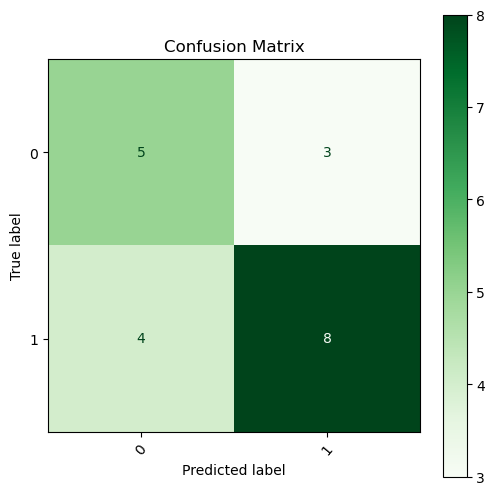

In [18]:
acc, bal_acc = compute_metrics(y_test)

print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")

show_conf_matrix(y_test)